<a href="https://colab.research.google.com/github/lee-hyeon-gu/alpah_main/blob/main/01_%EC%9B%B9_%ED%81%AC%EB%A1%A4%EB%A7%81_%EC%88%98%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 제일큰거
## 두번째
### 세번째

- 마크
- 마크

1.ㅁㄴㅇㄹ
1.ㅁㄴㅇㄹ
1.ㅁㄴㅇㄹ

__볼드__

-기울기-

readme.md

In [ ]:
import pickle

with open('data.pickle','wb'_as fw:
          pickle)

In [ ]:
import requests
from bs4 import BeautifulSoup


In [ ]:
resp= requests.get('https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%82%BC%EC%84%B1&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=20&mynews=0&office_type=0&office_section_code=0&news_office_checked=&office_category=0&service_area=0&nso=so:r,p:all,a:all&start=1')
resp.content
print(resp)

<Response [200]>


In [55]:
soup=BeautifulSoup(resp.content,'lxml')
titles_slt=soup.select('.news_tit')
titles_slt

for i in titles_slt:
    print(i.text)

삼성, 세계서 가장 혁신적인 기업… 애플, 삼성보다 R&D 투자 더 많이 해
[酒절주절]〈18〉삼성家과 술
"메시 같은 염소 되겠다"…삼성 임원이 '깜짝 선언'한 이유 [김익환의 컴퍼니...
전체 1순위 최주환 키움 품에… 이상규 한화, 최성훈 삼성行
“삼성, 애플 앞마당서 내년 1월17일 갤S24 공개”
[르포]“추석 이후 문의전화 한통이 없어요”…삼성동 아파트 매매시장도 임시...
朴 "내가 삼성병원장 꾸짖었다? 사진 한장이 괴담 만들었다" [박근혜 회고록]
삼성D, '호황기' 3분기 지난 4분기 이후 실적 촉각
[10시 시황 해설자들 - 해설자들] 삼성전자는 '이 때' 올랐습니다
[김대호 박사의 오늘 기업·사람] 노스볼트·폭스바겐·LG엔솔·폭스콘·애플...


In [ ]:
title_list=[]
for i in titles_slt:
    title_list.append(i.text)
for i in title_list:
    print(i)

In [ ]:
#sp_nws21 > div > div > div.news_contents > div > div > a
body=BeautifulSoup(resp.content,'lxml').select('a.api_txt_lines.dsc_txt_wrap') # 개발자에서 복사하면 . 이 누락되는경우가 있다 이경우 스크랩 안됨

body
for b in body:
    print(b.text)
    print('---------------')

In [85]:
all_news_list=[]
for t,b in zip(titles_slt,body):
    single_news ={'title':t.text,'body':b.text} # 딕셔너리
    all_news_list.append(single_news)
all_news_list

import pandas as pd
news_df=pd.DataFrame(all_news_list)
news_df.to_csv('adsf.csv',index=False)

In [ ]:
my_df=pd.read_csv('adsf.csv')
my_df

# 아래는 하나로 합친것

In [91]:
dic={'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36 Edg/119.0.0.0'}
resp= requests.get('https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%82%BC%EC%84%B1&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=40&mynews=0&office_type=0&office_section_code=0&news_office_checked=&office_category=0&service_area=0&nso=so:r,p:all,a:all&start=1')
resp.content
print(resp)

title=BeautifulSoup(resp.content,'lxml').select('.news_tit')
body=BeautifulSoup(resp.content,'lxml').select('a.api_txt_lines.dsc_txt_wrap')

all_news_list=[]
for t,b in zip(title,body):
    single_news ={'title':t.text,'body':b.text} # 딕셔너리
    all_news_list.append(single_news)
all_news_list
import pandas as pd
news_df=pd.DataFrame(all_news_list)
news_df

<Response [403]>


""


# 파일로받기

In [ ]:
with open('naver_news.txt','r') as f: #파일열기
    cvv=f.read()
title=BeautifulSoup(cvv,'lxml').select('.news_tit')
body=BeautifulSoup(cvv,'lxml').select('a.api_txt_lines.dsc_txt_wrap')

all_news_list=[]
for t,b in zip(title,body):
    single_news ={'title':t.text,'body':b.text} # 딕셔너리
    all_news_list.append(single_news)
all_news_list
import pandas as pd
news_df=pd.DataFrame(all_news_list)
news_df

# 시간 받아오기

In [ ]:
time=BeautifulSoup(cvv,'lxml').select('.info_group span')
#sp_nws21 > div > div > div.news_info > div.info_group > span
for t in time:
    if '전' in t.text:
        print(t.text.split('전')[0].strip())


## 정규표현식 응용

In [ ]:
import re
time=BeautifulSoup(cvv,'lxml').select('.info_group')
#sp_nws21 > div > div > div.news_info > div.info_group > span
for t in time:
    # print(t.text)
    print(re.findall('(\d+[분|시|일|주|달])',t.text)[0])

import datetime
kst=datetime.timezone(datetime.timedelta(hours=9))# 한국기준시로 바꾸기
datetime.datetime.now(kst) +datetime.timedelta(days=100)

In [ ]:
#apply
def calc_release(df):
    if '시' in df['before']:
        h = int(df['before'].split('시')[0])
        return df['scrap day']-datetime.timedelta(hours=h)
    elif '일' in df['before']:
        d = int(df['before'].split('일')[0])
        return df['scrap day']-datetime.timedelta(days=d)
    elif '주' in df['before']:
        w = int(df['before'].split('주')[0])
        return df['scrap day']-datetime.timedelta(weeks=w)
    elif '분' in df['before']:
        m = int(df['before'].split('분')[0])
        return df['scrap day']

news_df.apply(calc_release,axis=1)

In [ ]:

all_news_list=[]
for i in range(10):
    with open(f'naver_news_{i}.txt','r') as f: # f스트링을 이용한 방법 포멧보다 낫다
        cvv=f.read()

    title=BeautifulSoup(cvv,'lxml').select('.news_tit')
    body=BeautifulSoup(cvv,'lxml').select('a.api_txt_lines.dsc_txt_wrap')
    time=BeautifulSoup(cvv,'lxml').select('.info_group')


    for t,b,m in zip(title,body,time):
        single_news ={'title':t.text,'body':b.text,'before':re.findall('(\d+[분|시|일|주|달])',m.text)[0],'scrap day':datetime.datetime.now(kst).date()} # 딕셔너리
        all_news_list.append(single_news)
    all_news_list

import pandas as pd
news_df=pd.DataFrame(all_news_list)

news_df['release_date']=news_df.apply(calc_release,axis=1)
news_df


In [169]:
news_df['release_date'].value_counts()

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

fig=px.pie(news_df,names='release_date')
fig


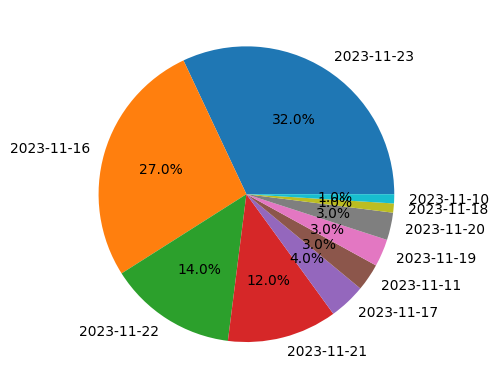

In [167]:
cnt=news_df['release_date'].value_counts()
cnt

plt.pie(cnt.values,labels=cnt.index, autopct='%1.1f%%')
plt.show()